# Capstone Project - Car accident severity
### Applied Data Science  Capstone by Marquise Piton
### September 18, 2020


## Table of contents
* [1. Introduction: Business Problem](#Introduction)
* [2. Data](#Data)
* [3. Methodology](#Methodology)
* [4. Analysis](#Analysis)
* [5. Result and Discussion](#Result)
* [6. Conclusion](#Conclusion)


## 1.Introduction: Business Problem <a name="Introduction"></a>
###  Background

Driving is an essential task in most adult's lives. On January 29th, 1886, the first automobile was created, which revolutionized our lives in every way. You drive to work, buy groceries from the store, travel to other places for vacation, and many more examples. Knowing the importance of driving in our daily lives, we must also consider the dangers of getting behind the wheel and examine the various causes of accidents. 

###  Problem

Many of the weather conditions and road conditions can affect the driver's ability. On the other hand, the driver can't control the conditions of the weather or roads. Still, suppose if there was a study that can inform the driver of the possibilities of getting into an accident base on the road and weather conditions. In that case, this could have a beneficial effect on the driver's ability to drive in these conditions and how severe the accident will be if you were in an accident. 

###  Interest 

Anyone that uses a car for professional or casual reasons would be very interested in theses studied predictions. This study could save lives, money, or even prevent traffic jams in the future. 

## 2. Data <a name="Data"></a>
### Data sources

The data I will be using will come from the "Applied Data Science Capstone" course under the "Introduction to Capstone Project." Here is a link that will take you to the data source: https://www.coursera.org/learn/applied-data-science-capstone/supplement/Nh5uS/downloading-example-dataset. The data showcase the different types of accidents and the various conditions (weather and road). With this data, we could calculate the possible severity of an accident based on situations and inform the driver, possibly implementing safer driving decisions.

## 3. Methodology <a name="Methodology"></a>

For this project, we will look at the road and light conditions to see if there is a correlation between them.  Then examine the location of where these accidents are taking place. 

In the first step, we will isolate the data light and road condition into one group and examine the combination using charts. 

For the second step, the location of each case will viewed using "X" (Longitude) and  "Y" (Latitude) data frame.

## 4. Analysis <a name="Analysis"></a>

###  Road Conditions and Severity of Accidents

In [133]:
# Let start by importing the needed libraries to help with our analytics.
import numpy as np
import pandas as pd
import math 

In [134]:
# The dataset we will be using
df = pd.read_csv('datacollisions.csv')
print("Data as been uploaded...")
# lets change some of the column names so it would be eaiser to identify the info the columns show.
dataframe_renamed = df.rename(columns={'SEVERITYCODE': "Severity Level" ,'X': 'Longitude', 
                               'Y': 'Latitude', 'OBJECTID':'Object ID','INCKEY':'INC Key','REPORTNO': 'Report #', 
                                       'STATUS':'Status', 'ADDRTYPE': 'Address Type', 'INTKEY':'INT Key','ROADCOND': 'Road Condition', 'LIGHTCOND': 'Light Condition'})
dataframe_renamed

Data as been uploaded...


,Severity Level,Longitude,Latitude,Object ID,INC Key,COLDETKEY,Report #,Status,Address Type,INT Key,...,Road Condition,Light Condition,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


Base on what I seen from the dataset, I wanted to see if there were a correlation between the Road conditon and light conditon. On how to do this, I will write a function that will count all the possible combine conditons and then I will graph them base on the output. 

In [245]:
#Obtaining only the Road and Light Condition data
Road_and_Light_Conditions_df = dataframe_renamed[['Road Condition','Light Condition']]
Road_and_Light_Conditions_df


,Road Condition,Light Condition
0,Wet,Daylight
1,Wet,Dark - Street Lights On
2,Dry,Daylight
3,Dry,Daylight
4,Wet,Daylight
5,Dry,Daylight
6,Wet,Daylight
7,Dry,Daylight
8,Dry,Daylight
9,Dry,Daylight


In [246]:
#This code will see all the different combination  of conditions
Count = Road_and_Light_Conditions_df.groupby(['Road Condition', 'Light Condition']).size() 
print(Count)   

Road Condition  Light Condition         
Dry             Dark - No Street Lights       857
                Dark - Street Lights Off      675
                Dark - Street Lights On     28184
                Dark - Unknown Lighting         4
                Dawn                         1268
                Daylight                    87408
                Dusk                         3869
                Other                         106
                Unknown                      2001
Ice             Dark - No Street Lights        23
                Dark - Street Lights Off       16
                Dark - Street Lights On       469
                Dawn                           62
                Daylight                      548
                Dusk                           19
                Other                           1
                Unknown                        70
Oil             Dark - No Street Lights         5
                Dark - Street Lights On        13
         

In [247]:
#Import Matplotlib to do some graphing with the data we have now.
import matplotlib.pyplot as plt

Now we will plot each colomn from the "Road_and_Light_Conditions_df" dataset

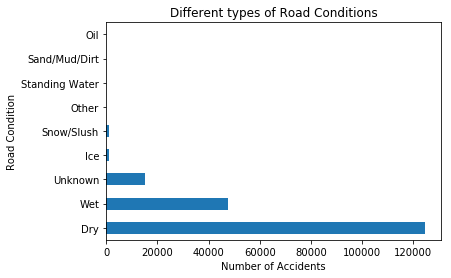

In [275]:
plt.title('Different types of Road Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Condition')
Road_Condition = Road_and_Light_Conditions_df['Road Condition'].value_counts().head(30).plot(kind='barh')

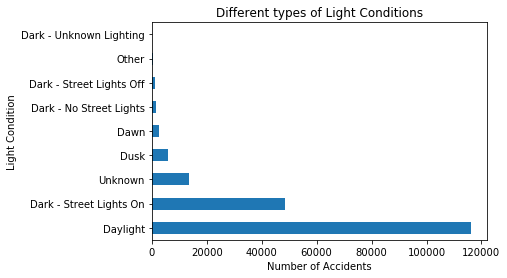

In [278]:
plt.title('Different types of Light Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Light Condition')
Road_and_Light_Conditions_df['Light Condition'].value_counts().head(30).plot(kind='barh')

In [281]:
Road_and_Light_Conditions_df['Road/Light Condition'] = Road_and_Light_Conditions_df['Road Condition'].str.cat(Road_and_Light_Conditions_df['Light Condition'])
Road_and_Light_Conditions_df

C:\Users\quise\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Road Condition,Light Condition,Road/Light Condition
0,Wet,Daylight,WetDaylight
1,Wet,Dark - Street Lights On,WetDark - Street Lights On
2,Dry,Daylight,DryDaylight
3,Dry,Daylight,DryDaylight
4,Wet,Daylight,WetDaylight
5,Dry,Daylight,DryDaylight
6,Wet,Daylight,WetDaylight
7,Dry,Daylight,DryDaylight
8,Dry,Daylight,DryDaylight
9,Dry,Daylight,DryDaylight


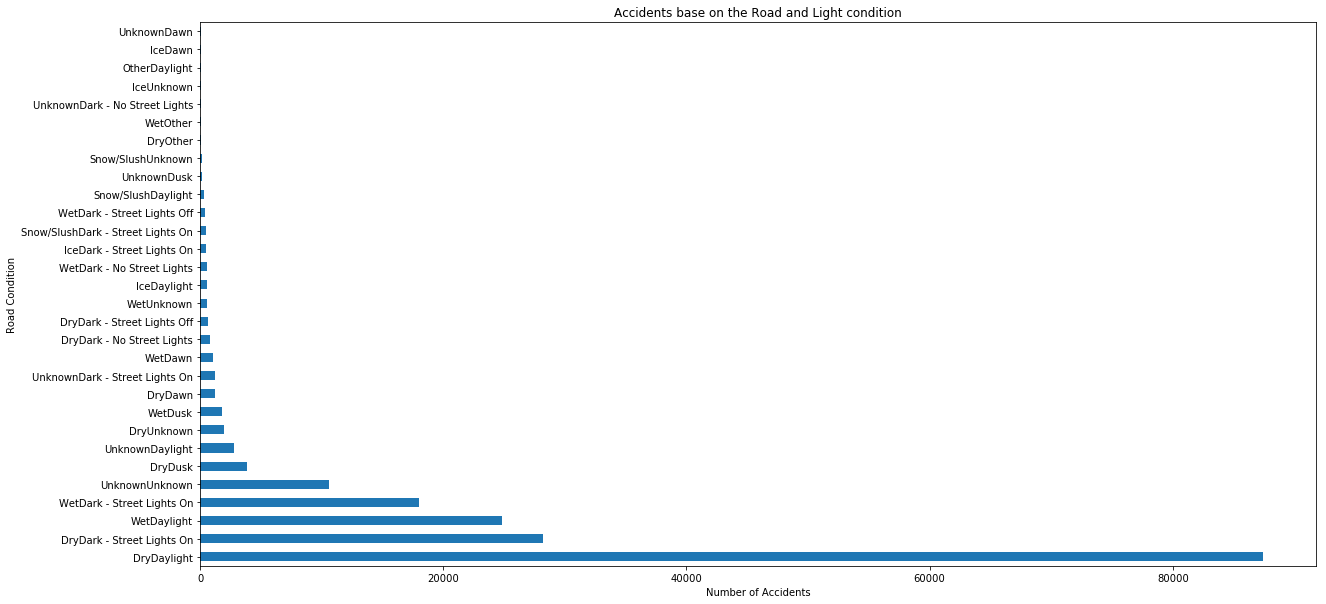

In [285]:
plt.title('Accidents base on the Road and Light condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Condition')
Road_Condition = Road_and_Light_Conditions_df['Road/Light Condition'].value_counts().head(30).plot(kind='barh',figsize=(20,10))

It appears that three times more accidents happen during the day time when it is dry. Let's take a look at the location of each accidents. 

In [342]:
long_lat_df = dataframe_renamed[['Longitude','Latitude']]

long_lat_df

,Longitude,Latitude
0,-122.323148,47.703140
1,-122.347294,47.647172
2,-122.334540,47.607871
3,-122.334803,47.604803
4,-122.306426,47.545739
5,-122.387598,47.690575
6,-122.338485,47.618534
7,-122.320780,47.614076
8,-122.335930,47.611904
9,-122.384700,47.528475


In [368]:
from sklearn.linear_model import LinearRegression
import numpy as np
long_lat_df_test = long_lat_df[long_lat_df["Longitude"]> 0].copy()

In [369]:
y_pred = []
y_true = []

In [373]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=15, random_state = 42)
for train_index, test_index in kf.split(long_lat_df_test):
    df_test = long_lat_df_test.iloc[test_index]
    df_train = long_lat_df_test.iloc[train_index]

ValueError: Cannot have number of splits n_splits=15 greater than the number of samples: n_samples=0.

In [348]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')


Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


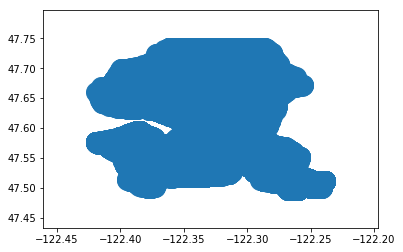

In [364]:
import matplotlib.pyplot as plt
plt.scatter(x=long_lat_df['Longitude'], y=long_lat_df['Latitude'], s=400)
plt.show()

# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)


#for i in long_lat_df.items():
 #   folium.Marker(location=i[1], popup=i[0]).add_to(map_cities)
  #  print(i)


# display world map
world_map

## 5. Result and Discussion <a name="Result"></a>

Base on our analysis, there is a high volume of accidents occurring when the Roads are dry, and it's daytime. Oddly the same, there is a less occurs of accidents occurring when it is wet and dark outside. Why is that?  Through the study, I came with a hypothesis that people are more aware when the conditions are more dangerous and less familiar when the conditions are less threatening.  But at the same time, the severity of accidents is higher when the conditions are worst. In other words, accidents happen a lot during normal conditions but not as severe. When the conditions are worst, fewer accidents happen, but they are more severe if there are accidents. 

## 6. Conclusion <a name="Conclusion"></a>

This report aimed to understand why car frequently happens during a particular time of the day and the road conditions that may occur altogether. Driving is a vital task throughout our lives, and it's only natural to inform everyone of the dangers and build more awareness while cars. Now with this interpreted data, maybe the solutions will be more exact on how we can limit accidents. If accidents do happen, how we can help mitigate the severity of the casualties. I believe stakeholders, researchers, professionals, and civilians will find this study helpful. 